In [32]:
import random

popsize = 100

genes = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOP 
QRSTUVWXYZ 1234567890, .-;:_!"#%&/()=?@${[]}'''

target = 'i love ringna nu bhartu'

class individual:
    def __init__(self, chromosomes):
        self.chromosomes = chromosomes
        self.fitness = self.cal_fitness()
    
   
    def mutated_genes(self):
        global genes
        gene = random.choice(genes)
        return gene
    
    def create_gnome(self):
        global target
        length = len(target)
        return [self.mutated_genes() for _ in range(length)]
    
    def mate(self, par2):
        child_chromosomes = []
        for gp1, gp2 in zip(self.chromosomes, par2.chromosomes):
            prob=random.random()
            if(prob < 0.45):
                child_chromosomes.append(gp1)
                
            elif prob < 0.90:
                child_chromosomes.append(gp2)
            
            else :
                child_chromosomes.append(self.mutated_genes())
                
        return individual(child_chromosomes)
    
    def cal_fitness(self):
        
        global target
        fitness = 0
        for c, t in zip(target, self.chromosomes):
            if c != t:
                fitness += 1
        return fitness
    


def main():
    global popsize
    
    generation = 1
    
    found = False
    population=[]
    for _ in range(popsize):
        gnome = individual.create_gnome()
        population.append(individual(gnome))
        
    while not found:
        population = sorted(population, key = lambda x:x.fitness)
        
        if population[0].fitness <= 0:
            found = True
            break
            
        newgen = []
        
        s = int(popsize*0.1)
        population.extend(population[:s])
        
        s=int(popsize*0.9)
        
        for _ in range(s):
            par1 = random.choice(population[:50])
            par2 = random.choice(population[:50])
            child = par1.mate(par2)
            newgen.append(child)
            
        population = newgen
        
        print('Generation: {} \t String: {}: \t Fitness: {}'.format(generation, "".join(population[0].chromosomes, population[0].fitness)))
        generation+=1
        
if __name__ == '__main__':
    main()

TypeError: create_gnome() missing 1 required positional argument: 'self'

In [15]:
import threading as th
import random as rnd

data = []

def gen(val, lock):
    lock
    g = []
    for i in range(val):
        g.append(rnd.randint(0,1000))
    data.append(g)
        
if __name__=='__main__':
    lock = th.Lock()
    ths = []
    final = []
    for i in range(10):
        thread = th.Thread(target=gen, args=(50, lock))
        thread.start()
        ths.append(thread)
    for thread in ths:
        thread.join()

50


In [4]:
from keras.datasets import fashion_mnist as fm

data = fm.load_data()

In [5]:
import numpy as np

(trainX, trainY), (testX, testY) = data

In [6]:
trainX = np.reshape(trainX, (60000, 28,28,1))

In [7]:
def to_cat(x):
    shape=np.max(x)+1
    temp = np.shape(x)
    op=np.zeros(shape=(temp[0], shape), dtype=np.int8)
    for i in range(temp[0]):
        op[i][x[i]]=1
    return op
trainY=to_cat(trainY)
testY = to_cat(testY)

In [1]:
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization as bn
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import backend as K

print(K.image_data_format())

chanDim = -1
insh = (28,28,1)

model=Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=insh))
model.add(Activation('relu'))
model.add(bn(axis=chanDim))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(bn(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(bn(axis=chanDim))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(bn(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(bn(axis=chanDim))
model.add(Dropout(0.25))


model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()




Using TensorFlow backend.


channels_last
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 

In [8]:
model.fit(trainX, trainY, epochs=10, batch_size=50)

Epoch 1/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.4177 - accuracy: 0.8550
Epoch 2/10
60000/60000 [==============================] - 43s 720us/step - loss: 0.2727 - accuracy: 0.9024
Epoch 3/10
60000/60000 [==============================] - 41s 691us/step - loss: 0.2335 - accuracy: 0.9161
Epoch 4/10
60000/60000 [==============================] - 41s 690us/step - loss: 0.2073 - accuracy: 0.9250
Epoch 5/10
60000/60000 [==============================] - 41s 686us/step - loss: 0.1903 - accuracy: 0.9305
Epoch 6/10
60000/60000 [==============================] - 42s 694us/step - loss: 0.1772 - accuracy: 0.9354
Epoch 7/10
60000/60000 [==============================] - 42s 707us/step - loss: 0.1609 - accuracy: 0.9412
Epoch 8/10
60000/60000 [==============================] - 41s 687us/step - loss: 0.1520 - accuracy: 0.9448
Epoch 9/10
60000/60000 [==============================] - 42s 706us/step - loss: 0.1426 - accuracy: 0.9482
Epoch 10/10
60000/60000 [==============

In [9]:
from keras.callbacks import ModelCheckpoint

cp = ModelCheckpoint(filepath = 'fmnist.h5', monitor='loss',verbose = 1, save_best_only=True, mode='min')
chp = [cp]
model.fit(trainX, trainY, epochs=10, batch_size=50, callbacks=chp)

Epoch 1/10
60000/60000 [==============================] - 57s 943us/step - loss: 0.1217 - accuracy: 0.9552

Epoch 00001: loss improved from inf to 0.12175, saving model to fmnist.h5
Epoch 2/10
36750/60000 [=================>............] - ETA: 22s - loss: 0.1131 - accuracy: 0.9589

KeyboardInterrupt: 

In [ ]:
from keras.models import load_model

mod = load_model('fmnist.h5')
best = mod.fit(trainX, trainY, epochs=3, batch_size=50, callbacks=chp)

Epoch 1/3
60000/60000 [==============================] - 59s 983us/step - loss: 0.1153 - accuracy: 0.9568

Epoch 00001: loss improved from 0.12175 to 0.11529, saving model to fmnist.h5
Epoch 2/3
60000/60000 [==============================] - 56s 935us/step - loss: 0.1084 - accuracy: 0.9606

Epoch 00002: loss improved from 0.11529 to 0.10845, saving model to fmnist.h5
Epoch 3/3
34150/60000 [================>.............] - ETA: 24s - loss: 0.1020 - accuracy: 0.9625

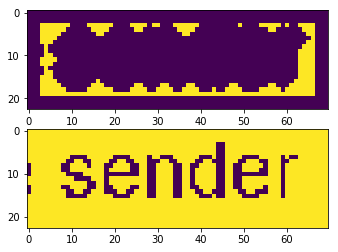

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

fig =  plt.figure()
a1 = fig.add_subplot(211)
a2 = fig.add_subplot(212)
image = cv.imread('garbage/w1.png')
grayScale = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
ret, img = cv.threshold(grayScale, 127, 255, 0)
a2.imshow(img)
ctr, hierarchy = cv.findContours(img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# print(ctr)

img2 = cv.drawContours(img, ctr, -1, (0,255,255), 3)

a1.imshow(img2)

In [3]:
m = cv.moments(ctr[1])
print(m)

{'m00': 4.0, 'm10': 246.0, 'm01': 24.0, 'm20': 15130.666666666666, 'm11': 1476.0, 'm02': 145.0, 'm30': 930741.0, 'm21': 90784.0, 'm12': 8917.5, 'm03': 882.0, 'mu20': 1.6666666666660603, 'mu11': 0.0, 'mu02': 1.0, 'mu30': 1.1641532182693481e-10, 'mu21': 3.637978807091713e-12, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.10416666666662877, 'nu11': 0.0, 'nu02': 0.0625, 'nu30': 3.637978807091713e-12, 'nu21': 1.1368683772161603e-13, 'nu12': 0.0, 'nu03': 0.0}


In [4]:
area = cv.contourArea(ctr[0])
print(area)

1513.0


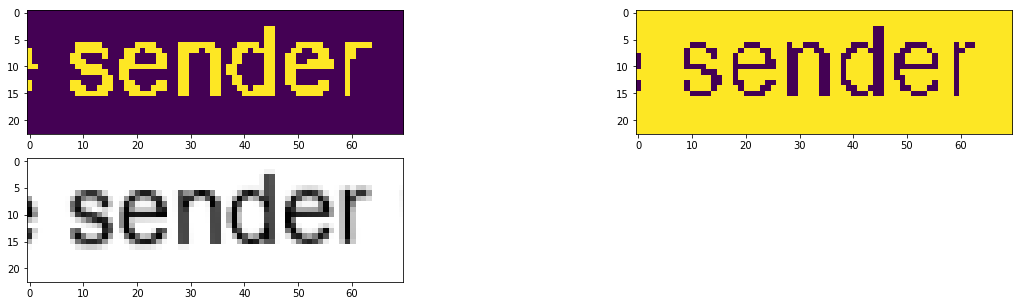

In [4]:
bell = cv.imread('garbage/w1.png')
fig = plt.figure(figsize=(20,5))
bellGray=cv.cvtColor(bell, cv.COLOR_RGB2GRAY)
ret, thresh = cv.threshold(bellGray, 170, 255, cv.THRESH_BINARY_INV)
ax = fig.add_subplot(221)
ax.imshow(thresh)

fig.add_subplot(223).imshow(bell)
ret, th2= cv.threshold(bellGray, 100, 255, cv.THRESH_BINARY)
fig.add_subplot(222).imshow(th2)
ctr, hie = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
ctr1, hie1 = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)

(2, 2)
(9, 2)
(14, 2)
(9, 2)
(4, 2)
(7, 2)
(18, 2)
(12, 2)
(22, 2)
(25, 2)
(14, 2)
(2, 2)
(11, 2)
(20, 2)
(12, 2)
(7, 2)
(24, 2)
(38, 2)
(45, 2)
(39, 2)
(43, 2)
(35, 2)


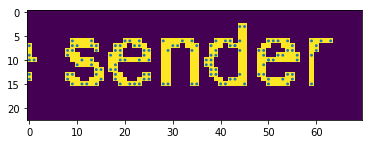

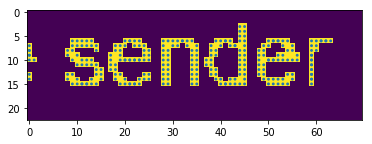

In [5]:
t=[]
ct=[]
for x in ctr:
    shape = np.shape(x)
    t = np.reshape(x, (shape[0], 2))
    ct.append(t)
    shape = np.shape(t)
    print(shape)
ct1=[]
t1=[]
for x1 in ctr1:
    shape = np.shape(x1)
    t1 = np.reshape(x1, (shape[0], 2))
    ct1.append(t1)
    shape = np.shape(t1)
    print(shape)
    
final = thresh
fin = thresh
# final = cv.drawContours(final, ctr, 4, (0,255,0), 3)
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
fig , ax = plt.subplots()
fig1 , ax1 = plt.subplots()
for x in ct:
    for co in x:
        ax.add_patch(Circle(co,0.3))
ax.imshow(final)

for x1 in ct1:
    for co1 in x1:
        ax1.add_patch(Circle(co1,0.3))
ax1.imshow(fin)

In [83]:
print(hie)
print(ctr)

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [-1  6 -1 -1]]]
[array([[[ 0, 13]],

       [[ 0, 14]]], dtype=int32), array([[[ 0,  7]],

       [[ 0,  8]],

       [[ 0,  9]],

       [[ 0, 10]],

       [[ 1, 10]],

       [[ 0,  9]],

       [[ 0,  8]]], dtype=int32), array([[[59,  6]],

       [[59,  7]],

       [[59,  8]],

       [[59,  9]],

       [[59, 10]],

       [[59, 11]],

       [[59, 12]],

       [[59, 13]],

       [[59, 14]],

       [[59, 15]],

       [[59, 14]],

       [[59, 13]],

       [[59, 12]],

       [[59, 11]],

       [[59, 10]],

       [[59,  9]],

       [[60,  8]],

       [[60,  7]],

       [[61,  6]],

       [[62,  6]],

       [[63,  6]],

       [[62,  6]],

       [[61,  6]],

       [[60,  6]]], dtype=int32), array([[[50,  6]],

       [[49,  7]],

       [[48,  8]],

       [[48,  9]],

       [[48, 10]],

       [[48, 11]],

       [[48, 12]],

       [[48, 13]],

       

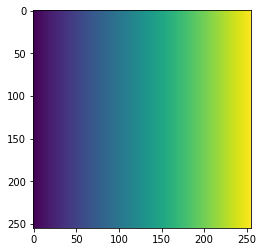

In [6]:
arr = []

for i in np.arange(0, 255):
    arr.append(np.arange(0,255))
plt.imshow(arr)
arr = np.array(arr)

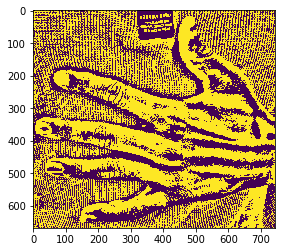

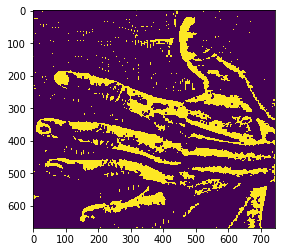

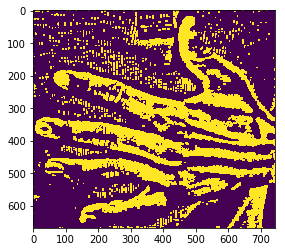

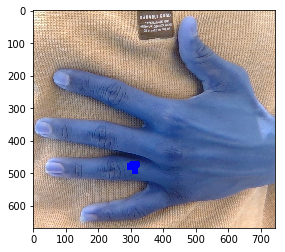

In [339]:
image = cv.imread('garbage/hand1.png')

# _, ax1=plt.subplots()
# ax1.imshow(blur)
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY, 51, 2)
fig, ax1=plt.subplots()
ax1.imshow(thresh)
# blur = cv.GaussianBlur(blur, (15,15), 0)
# r, t = cv.threshold(thresh, 0, 255, cv.THRESH_OTSU+cv.THRESH_BINARY)
# show(t)
t = cv.erode(t, None, iterations=2)
show(t)
t = cv.dilate(t, None, iterations=2)
show(t)
# t = cv.erode(t, None, iterations=4)
# show(t)
# t = cv.dilate(t, None, iterations=20)
# show(t)


ct, hr = cv.findContours(t, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

i = cv.drawContours(image.copy(), ctr, -1, (0,0,255), -1)
show(i)

3


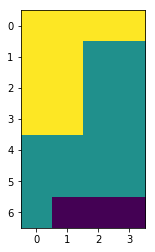

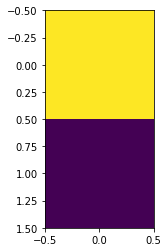

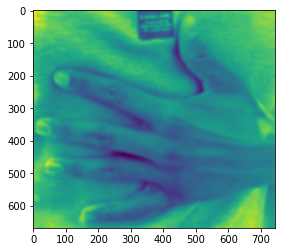

In [92]:
ctr, hie = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
rects = []

from matplotlib.patches import Rectangle
for c in ctr:
    shape = np.shape(c)
    c = np.reshape(c, (shape[0], 2))
    x, y, w, h = cv.boundingRect(c)
    rects.append([x, y, w,h])

print(len(rects))
for rect in rects:
    fig, ax = plt.subplots()
    ax.imshow(gray[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]])

[[[564 564]]

 [[  0   0]]]


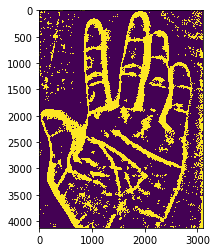

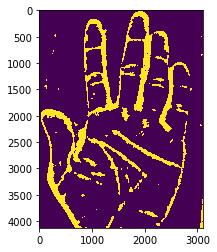

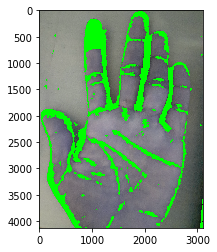

In [389]:
hand = cv.imread('garbage/hand5.png')
gray = cv.cvtColor(hand, cv.COLOR_RGB2GRAY)
# show(gray)
blur = cv.GaussianBlur(gray, (5,5), 0) 

thresh = cv.adaptiveThreshold(blur, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 601, 3)
# _, thresh = cv.threshold(blur, 30, 255, cv.THRESH_OTSU+cv.THRESH_BINARY)
show(thresh)
thresh = cv.erode(thresh, None, iterations=10)
# show(thresh)
thresh = cv.dilate(thresh, None, iterations=8)

show(thresh)
ctr, hie = cv.findContours(thresh.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)



hull = cv.convexHull(ms)
print(hull)
i=cv.drawContours(hand.copy(), ctr, -1, (0,255,0),-1)
show(i)


In [21]:
def show(image):
    _, ax = plt.subplots()
    ax.imshow(image)

92


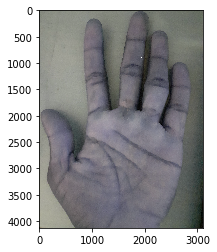

In [392]:
ms = []
centers=[]
ct=0
for i in range(len(ctr)):
    M = cv.moments(ctr[i])
    if(M['m00']):
        ct+=1
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        centers.append([cX,cY])
        for j in range(len(ctr[i])):
            ms.append([ctr[i][j][0][0], ctr[i][j][0][0]])
        
ms = np.asarray(ms)

for cen in centers:
    img=cv.circle(hand.copy(), (cX, cY), 7, (255, 255, 255), -1)
plt.imshow(img)
print(ct)

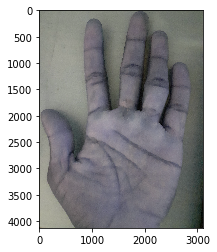

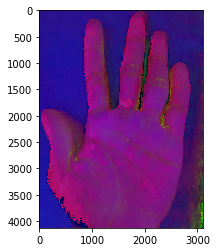

In [25]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np


def show(image):
    _, ax = plt.subplots()
    ax.imshow(image)
    
    
hand = cv.imread('garbage/hand5.png')
hsv = cv.cvtColor(hand.copy(), cv.COLOR_RGB2HSV)


show(hand)
show(hsv)

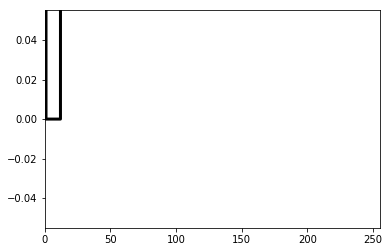

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

cap = cv.VideoCapture(0)
face = cv.CascadeClassifier('garbage/haarcascade_frontalface_default.xml')
fig, ax = plt.subplots()
bins=256
gl, = ax.plot(np.arange(bins), np.zeros((bins,1)), c='k', lw=3)
ax.set_xlim(0, bins-1)
# ax.set_ylim()

while True:
    _,frame = cap.read()
#     gray = cv.cvtColor(frame, cv.COLOR_RGB2GRAY)
    face_coord = face.detectMultiScale(frame, 1.4, 5)
    if(len(face_coord)!=0):
        for x, y, w, h in face_coord:
            frameh = frame.copy()
            cv.rectangle(frameh, (x,y), (x+w, y+h), (255,5,65),2)
        
        facereg=frame[y:y+h, x:x+w]
        
        
    else:
        frameh=frame.copy()
        facereg = frameh
    cv.imshow('original', frame)
#     frameh = cv.cvtColor(frame, cv.COLOR_RGB2HSV)
#     frameh = cv.inRange(frame, np.array([100, 23, 82]), np.array([180, 255, 255]))
    his = cv.calcHist([frame], [0], None, [256], [0, 256])
#     print(his.shape)
    cv.imshow('hsv', frameh)
    gl.set_ydata(his)
    fig.canvas.draw()
    key = cv.waitKey(3)
    if key == 27:            
        cap.release() 
        cv.destroyAllWindows()  
        break


In [7]:
import cv2 as cv
import numpy as np
import argparse
max_value = 255
max_value_H = 360//2
low_H = 0
low_S = 0
low_V = 0
high_H = max_value_H
high_S = max_value
high_V = max_value
window_capture_name = 'Video Capture'
window_detection_name = 'Object Detection'
low_H_name = 'Low H'
low_S_name = 'Low S'
low_V_name = 'Low V'
high_H_name = 'High H'
high_S_name = 'High S'
high_V_name = 'High V'
def on_low_H_thresh_trackbar(val):
    global low_H
    global high_H
    low_H = val
    low_H = min(high_H-1, low_H)
    cv.setTrackbarPos(low_H_name, window_detection_name, low_H)
def on_high_H_thresh_trackbar(val):
    global low_H
    global high_H
    high_H = val
    high_H = max(high_H, low_H+1)
    cv.setTrackbarPos(high_H_name, window_detection_name, high_H)
def on_low_S_thresh_trackbar(val):
    global low_S
    global high_S
    low_S = val
    low_S = min(high_S-1, low_S)
    cv.setTrackbarPos(low_S_name, window_detection_name, low_S)
def on_high_S_thresh_trackbar(val):
    global low_S
    global high_S
    high_S = val
    high_S = max(high_S, low_S+1)
    cv.setTrackbarPos(high_S_name, window_detection_name, high_S)
def on_low_V_thresh_trackbar(val):
    global low_V
    global high_V
    low_V = val
    low_V = min(high_V-1, low_V)
    cv.setTrackbarPos(low_V_name, window_detection_name, low_V)
def on_high_V_thresh_trackbar(val):
    global low_V
    global high_V
    high_V = val
    high_V = max(high_V, low_V+1)
    cv.setTrackbarPos(high_V_name, window_detection_name, high_V)


def preprocess(action_frame):

    blur = cv.GaussianBlur(action_frame, (3,3), 0)
    hsv = cv.cvtColor(blur, cv.COLOR_RGB2HSV)

    lower_color = np.array([108, 23, 82])
    upper_color = np.array([179, 255, 255])

    mask = cv.inRange(hsv, lower_color, upper_color)
    blur = cv.medianBlur(mask, 5)

    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (8, 8))
    hsv_d = cv.dilate(blur, kernel)

    return hsv_d

cap = cv.VideoCapture(0)
cv.namedWindow(window_capture_name)
cv.namedWindow(window_detection_name)
cv.createTrackbar(low_H_name, window_detection_name , low_H, max_value_H, on_low_H_thresh_trackbar)
cv.createTrackbar(high_H_name, window_detection_name , high_H, max_value_H, on_high_H_thresh_trackbar)
cv.createTrackbar(low_S_name, window_detection_name , low_S, max_value, on_low_S_thresh_trackbar)
cv.createTrackbar(high_S_name, window_detection_name , high_S, max_value, on_high_S_thresh_trackbar)
cv.createTrackbar(low_V_name, window_detection_name , low_V, max_value, on_low_V_thresh_trackbar)
cv.createTrackbar(high_V_name, window_detection_name , high_V, max_value, on_high_V_thresh_trackbar)
while True:
    
    ret, frame = cap.read()
    if frame is None:
        break
    frame_HSV = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    frame_threshold = cv.inRange(frame_HSV, (low_H, low_S, low_V), (high_H, high_S, high_V))
    frame_threshold = preprocess(frame)
    
    cv.imshow(window_capture_name, frame)
    cv.imshow(window_detection_name, frame_threshold)
    
    key = cv.waitKey(30)
    if key == ord('q') or key == 27:
        cap.release()
        cv.destroyAllWindows()
        break

AttributeError: module 'cv2.cv2' has no attribute 'destroyAllWindowstroy'

In [30]:
from keras.models import load_model

model = load_model('garbage/models/gesture_3')
print(model.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 42)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1376      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               1651

In [11]:
#collection of all imp functions
import cv2 as cv
import numpy as np
import tensorflow as tf
import math
import pandas as pd

# inter=tf.lite.Interpreter('garbage/models/hand_landmark.tflite')
# inter.allocate_tensors()
# ip = inter.get_input_details()
# op = inter.get_output_details()
# ip_tensor_index = ip[0]['index']
# op_tensor_index = op[0]['index']

connections = [
    (0, 1), (1, 2), (2, 3), (3, 4),
    (5, 6), (6, 7), (7, 8),
    (9, 10), (10, 11), (11, 12),
    (13, 14), (14, 15), (15, 16),
    (17, 18), (18, 19), (19, 20),
    (0, 5), (5, 9), (9, 13), (13, 17), (0, 17)
]

def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
   
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.compat.v1.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.compat.v1.global_variables()]
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = tf.compat.v1.graph_util.convert_variables_to_constants(
            session, input_graph_def, output_names, freeze_var_names)
        return frozen_graph
    

def load_images():
    import os
    root = 'garbage\ges'
    images = []
    for file in os.listdir(root):
        if file.endswith('.jpeg'):
            path = os.path.join(root,file)
            img = cv.imread(path)
            images.append(img)
    return images


def preprocess(image, new_dim=(256,256)):
    w,h,_ = image.shape
    bigger = max(w,h)
    n_w, n_h = int((w/bigger)*new_dim[0]), int((h/bigger)*new_dim[1]) 
    feed = cv.resize(image, (n_h, n_w))
    feed = feed.astype(np.float32)
    feed = feed/255
    ow, oh = int((256-n_w)/2), int((256-n_h)/2)
    feed = cv.copyMakeBorder(feed, ow, ow, oh, oh, cv.BORDER_ISOLATED)
    feed = np.expand_dims(feed, axis=0)
    return feed

def run_inference(feed):
    inter.set_tensor(ip_tensor_index, feed)
    inter.invoke()
    data = inter.get_tensor(op_tensor_index)
    return data[0]

def show1d(final, landmark, boundingbox=False):
    if(landmark is not None):
        for i in range(21):  
            final = cv.circle(final, (data[i*2],data[i*2+1]), 3, (255,0,0), 3)
        for connection in connections:
            x0, y0 = data[connection[0]*2],data[connection[0]*2+1]
            x1, y1 = data[connection[1]*2],data[connection[1]*2+1]
            cv.line(final, (int(x0), int(y0)), (int(x1), int(y1)), (255,255,0), 2)
    if(boundingbox):
        data2d = np.reshape(landmark, (21,2))
        x, y, w, h = cv.boundingRect(data2d)
        cx, cy = (x+w)/2, (y+h)/2
        print("center: " + str(cx) + ',' + str(cy))
    
    return final

def rotate(coords, rad, point=None):
    if point is None:
        coords = coords.astype(np.float32)
        x,y,w,h = cv.boundingRect(coords)
        cx, cy = x+(w/2), y+(h/2)
    else:
        cx, cy = point
    
    sin = np.sin(rad)
    cos = np.cos(rad)
    n = []
    for point in coords:
        x = cx+((point[0]-cx)*cos) - ((point[1]-cy)*sin)
        y = cy+((point[0]-cx)*sin) + ((point[1]-cy)*cos)
        n.append([x,y])

    return np.asarray(n)

def show2d(final, data):
    for i in range(21):  
        final = cv.circle(final, (int(data[i][0]),int(data[i][1])), 3, (0,0,255), 3)
    for connection in connections:
        x0, y0 = data[connection[0]]
        x1, y1 = data[connection[1]]
        cv.line(final, (int(x0), int(y0)), (int(x1), int(y1)), (255,255,0), 2)

    return final

def getAngleDist(landmarks):
    finaldata=[]
    #divide the distance with the length of diagonal in order to normalize it
    diagonal = np.sqrt(2)*256
    print(landmarks.shape)
    for data in landmarks:
        ad=[]
        bp = data[0]
        for i in range(len(data)-1):
            fp = data[i+1]
            angle = math.atan2(bp[1]-fp[1],bp[0]-fp[0])
            angle=math.degrees(angle)
            dist=np.sqrt((bp[1]-fp[1])**2+(bp[0]-fp[0])**2)
            ad.append(angle)
            ad.append(dist/diagonal)
        finaldata.append(ad)
    return finaldata

#scale the landmarks Better to use fitIn
def scaleLandmark(landmark, scale=1.3, threshw=100):
    #landmark is one arg
    temp=landmark.copy()
    x = temp[:,0].copy()
    y = temp[:,1].copy()
    xmin, xmax = np.min(x), np.max(x)
    ymin, ymax = np.min(y), np.max(y)
    temp = temp - (xmin-10, ymin-10) 
    print(xmin, xmax, ymin, ymax)
    #actual width of hand
    rw = xmax-xmin
    #actual height of hand
    rh = ymax-ymin
    #aspect ratio of hand
    ar = rw/rh
    # print('rw rh ar')
    # print(rw, rh, ar)
    #scale factor one arg default 1.3
    #threshold width is also one arg default 100
    if rw<threshw or rh < threshw/ar:
        temp = temp*(scale, scale/ar)
        print(temp)
        print('in')
    return temp

#Use before feeding it to model both during training and predicting
def fitIn(landmark, finalw=130, offset=None, backToOriginalPlace=False):
    temp = landmark.copy()
    x = temp[:,0].copy()
    y = temp[:,1].copy()
    rw = np.max(x)-np.min(x)
    rh =np.max(y)-np.min(y)
    if rw == finalw or rh == finalw:
        return temp
    else:
        xmin = np.min(x)
        ymin = np.min(y)
        if rw < rh:
            ar = rw/rh
            facw = finalw/rw
            fach = finalw/(ar*rh)
        else:
            ar = rh/rw
            facw = finalw/(ar*rw)
            fach = finalw/rh
        temp = temp - (xmin, ymin)
        temp = temp*(facw, fach)
        if backToOriginalPlace:
            temp = temp + (xmin, ymin)
        if offset is not None:
            temp = temp + offset
        return temp.astype(np.float32)

#Show all the images in Window named demo
def showAll(c, shape=(480, 640), winName='demo'):
    for co in c:
        z = np.zeros(shape)
        fin = show2d(z, co)
        cv.imshow(winName, fin)
        cv.waitKey(0)

    cv.destroyAllWindows()    
    
def ClassToText(ind):
    if ind == -1:
        return 'No Detection'
    classes = ['One', 'Two', 'Three', 'Four', 'Five', 'Tasty', 'Spiderman', 'Superman', 'Thumbs Up']
    return classes[ind]

def normalizeLandmark(landmark, shape=None):
    if shape is None:
        return normalize(landmark)
    temp = landmark.copy()
    if temp is not None:
        temp[:,0] = temp[:,0]/shape[0]
        temp[:,1] = temp[:,1]/shape[1]
        return temp
    else: 
        return None

def normalize(landmark):
    temp = landmark.copy()
    rw = np.max(temp[:,0])-np.min(temp[:,0])
    rh =np.max(temp[:,1])-np.min(temp[:,1])
    xmin = np.min(temp[:,0])
    ymin = np.min(temp[:,1])
    temp=temp-(xmin, ymin)
    temp[:,0]=temp[:,0]/rw
    temp[:,1]=temp[:,1]/rh
    return temp

#resize the normalized landmarks according to given output width
def resizeLandmark(landmark, finalw, backToOriginalPlace, fac=None):
    temp = landmark.copy()
    x = temp[:,0].copy()
    y = temp[:,1].copy()
    rw = np.max(x)-np.min(x)
    rh = np.max(y)-np.min(y)
    xmin = np.min(x)
    ymin = np.min(y)
    if fac:
        temp = temp - (xmin-1, ymin-1)
        return temp*fac
    else:
        fac = finalw/rw
        temp = temp - (xmin-1, ymin-1)
        temp = temp*fac
        if backToOriginalPlace:
            temp = temp + (xmin, ymin)
        return temp

def addNoise(landmarks,nos = 100,low = -5,high = 5):
    noisy = []
    for temp in landmarks:
        for i in range(nos):
            noisef = np.random.random((21,2))
            noised = np.random.uniform(low, high,(21,2))
            noisy.append(temp.copy()+noisef+noised)
    return noisy

def generateSamples(pathtobasicges):
    x = pd.read_csv(pathtobasicges).to_numpy().astype(np.float32)
    #Reshpe to 21,2
    basic=[]
    for lm in x:
        basic.append(np.reshape(lm, (21,2)))

#     showAll(basic)
    #First rotate all coordinates
    rotated=[]
    rad = np.pi/180*1
    for temp in basic:
        for i in range(72):
            rotated.append(rotate(temp, rad*i))
    print(len(rotated))

    #Than fit it given width
    fit = []
    for ch in rotated:
        fit.append(fitIn(ch, 130, (5,5), False))
    # showAll(basic, (480,640,3))

    noisy = addNoise(fit, 200)
    print(len(noisy))
    
    #Reshape all coords from 21,2 to 42
    final=[]
    for lm in noisy:
        final.append(lm.flatten())
    final = np.asarray(final)
    final = final.astype(np.float32)
    
    size = len(final)
    nos = int(size/9)
    op = np.zeros(size, np.int8)

    for i in range(9):
        op[nos*i:nos*(i+1)]=i
#         print(op[nos*i:nos*(i+1)])
    
    import keras.utils as util
    
    op = util.to_categorical(op)
    
    return final,op

print('done')

done


In [2]:
from keras.layers import Dense, Activation, Dropout
from keras import Input
from keras import Model
import pandas as pd
import numpy as np

classes = 9
ipshape =  (42,)

ip = Input(shape=ipshape)
x = Dense(32, activation='relu')(ip)
x = Dense(64, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
op = Dense(classes, activation='softmax')(x)
model = Model(inputs = ip, outputs=op)
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])


Using TensorFlow backend.


In [3]:
trainx, trainy = generateSamples('garbage/feed/original2.csv')

1296
259200


In [4]:
model.fit(trainx, trainy, batch_size=10000, epochs=20)

Epoch 1/20
259200/259200 [==============================] - 2s 9us/step - loss: 5.1464 - accuracy: 0.1900
Epoch 2/20
259200/259200 [==============================] - 1s 6us/step - loss: 1.5560 - accuracy: 0.3960
Epoch 3/20
259200/259200 [==============================] - 2s 6us/step - loss: 0.8835 - accuracy: 0.6288
Epoch 4/20
259200/259200 [==============================] - 1s 6us/step - loss: 0.4429 - accuracy: 0.8256
Epoch 5/20
259200/259200 [==============================] - 1s 6us/step - loss: 0.1754 - accuracy: 0.9379
Epoch 6/20
259200/259200 [==============================] - 1s 6us/step - loss: 0.0754 - accuracy: 0.9756
Epoch 7/20
259200/259200 [==============================] - 1s 6us/step - loss: 0.0413 - accuracy: 0.9872
Epoch 8/20
259200/259200 [==============================] - 1s 6us/step - loss: 0.0266 - accuracy: 0.9920
Epoch 9/20
259200/259200 [==============================] - 1s 6us/step - loss: 0.0181 - accuracy: 0.9945
Epoch 10/20
259200/259200 [===================

In [18]:
fg = freeze_session(tf.compat.v1.keras.backend.get_session(), output_names=[out.op.name for out in model.outputs])

AssertionError: dense_8/Softmax is not in graph

In [35]:
import numpy as np
from pandas import DataFrame


x=np.random.randint(1000,size=480)
ind = x%2 == 0
x[ind] = 0
print(len(x))

480


In [44]:
s=slice(0,5)
s1 = slice(6,None)
print(s,s1)
sli = np.arange(10)[s]
sli1= np.arange(10)[s1]
print(sli)
print(sli1)

slice(0, 5, None) slice(6, None, None)
[0 1 2 3 4]
[6 7 8 9]


In [37]:
def p(lower,upper):
    a = []
    for num in range(lower, upper + 1):
       # all prime numbers are greater than 1
        if num > 1:
            for i in range(2, num):
                if (num % i) == 0:
                    break
            else:
                a.append(num)
    return a
# print("Prime numbers between", lower, "and", upper, "are:")
x = p(0,1000000)

KeyboardInterrupt: 

In [38]:
print(len(x))

20000


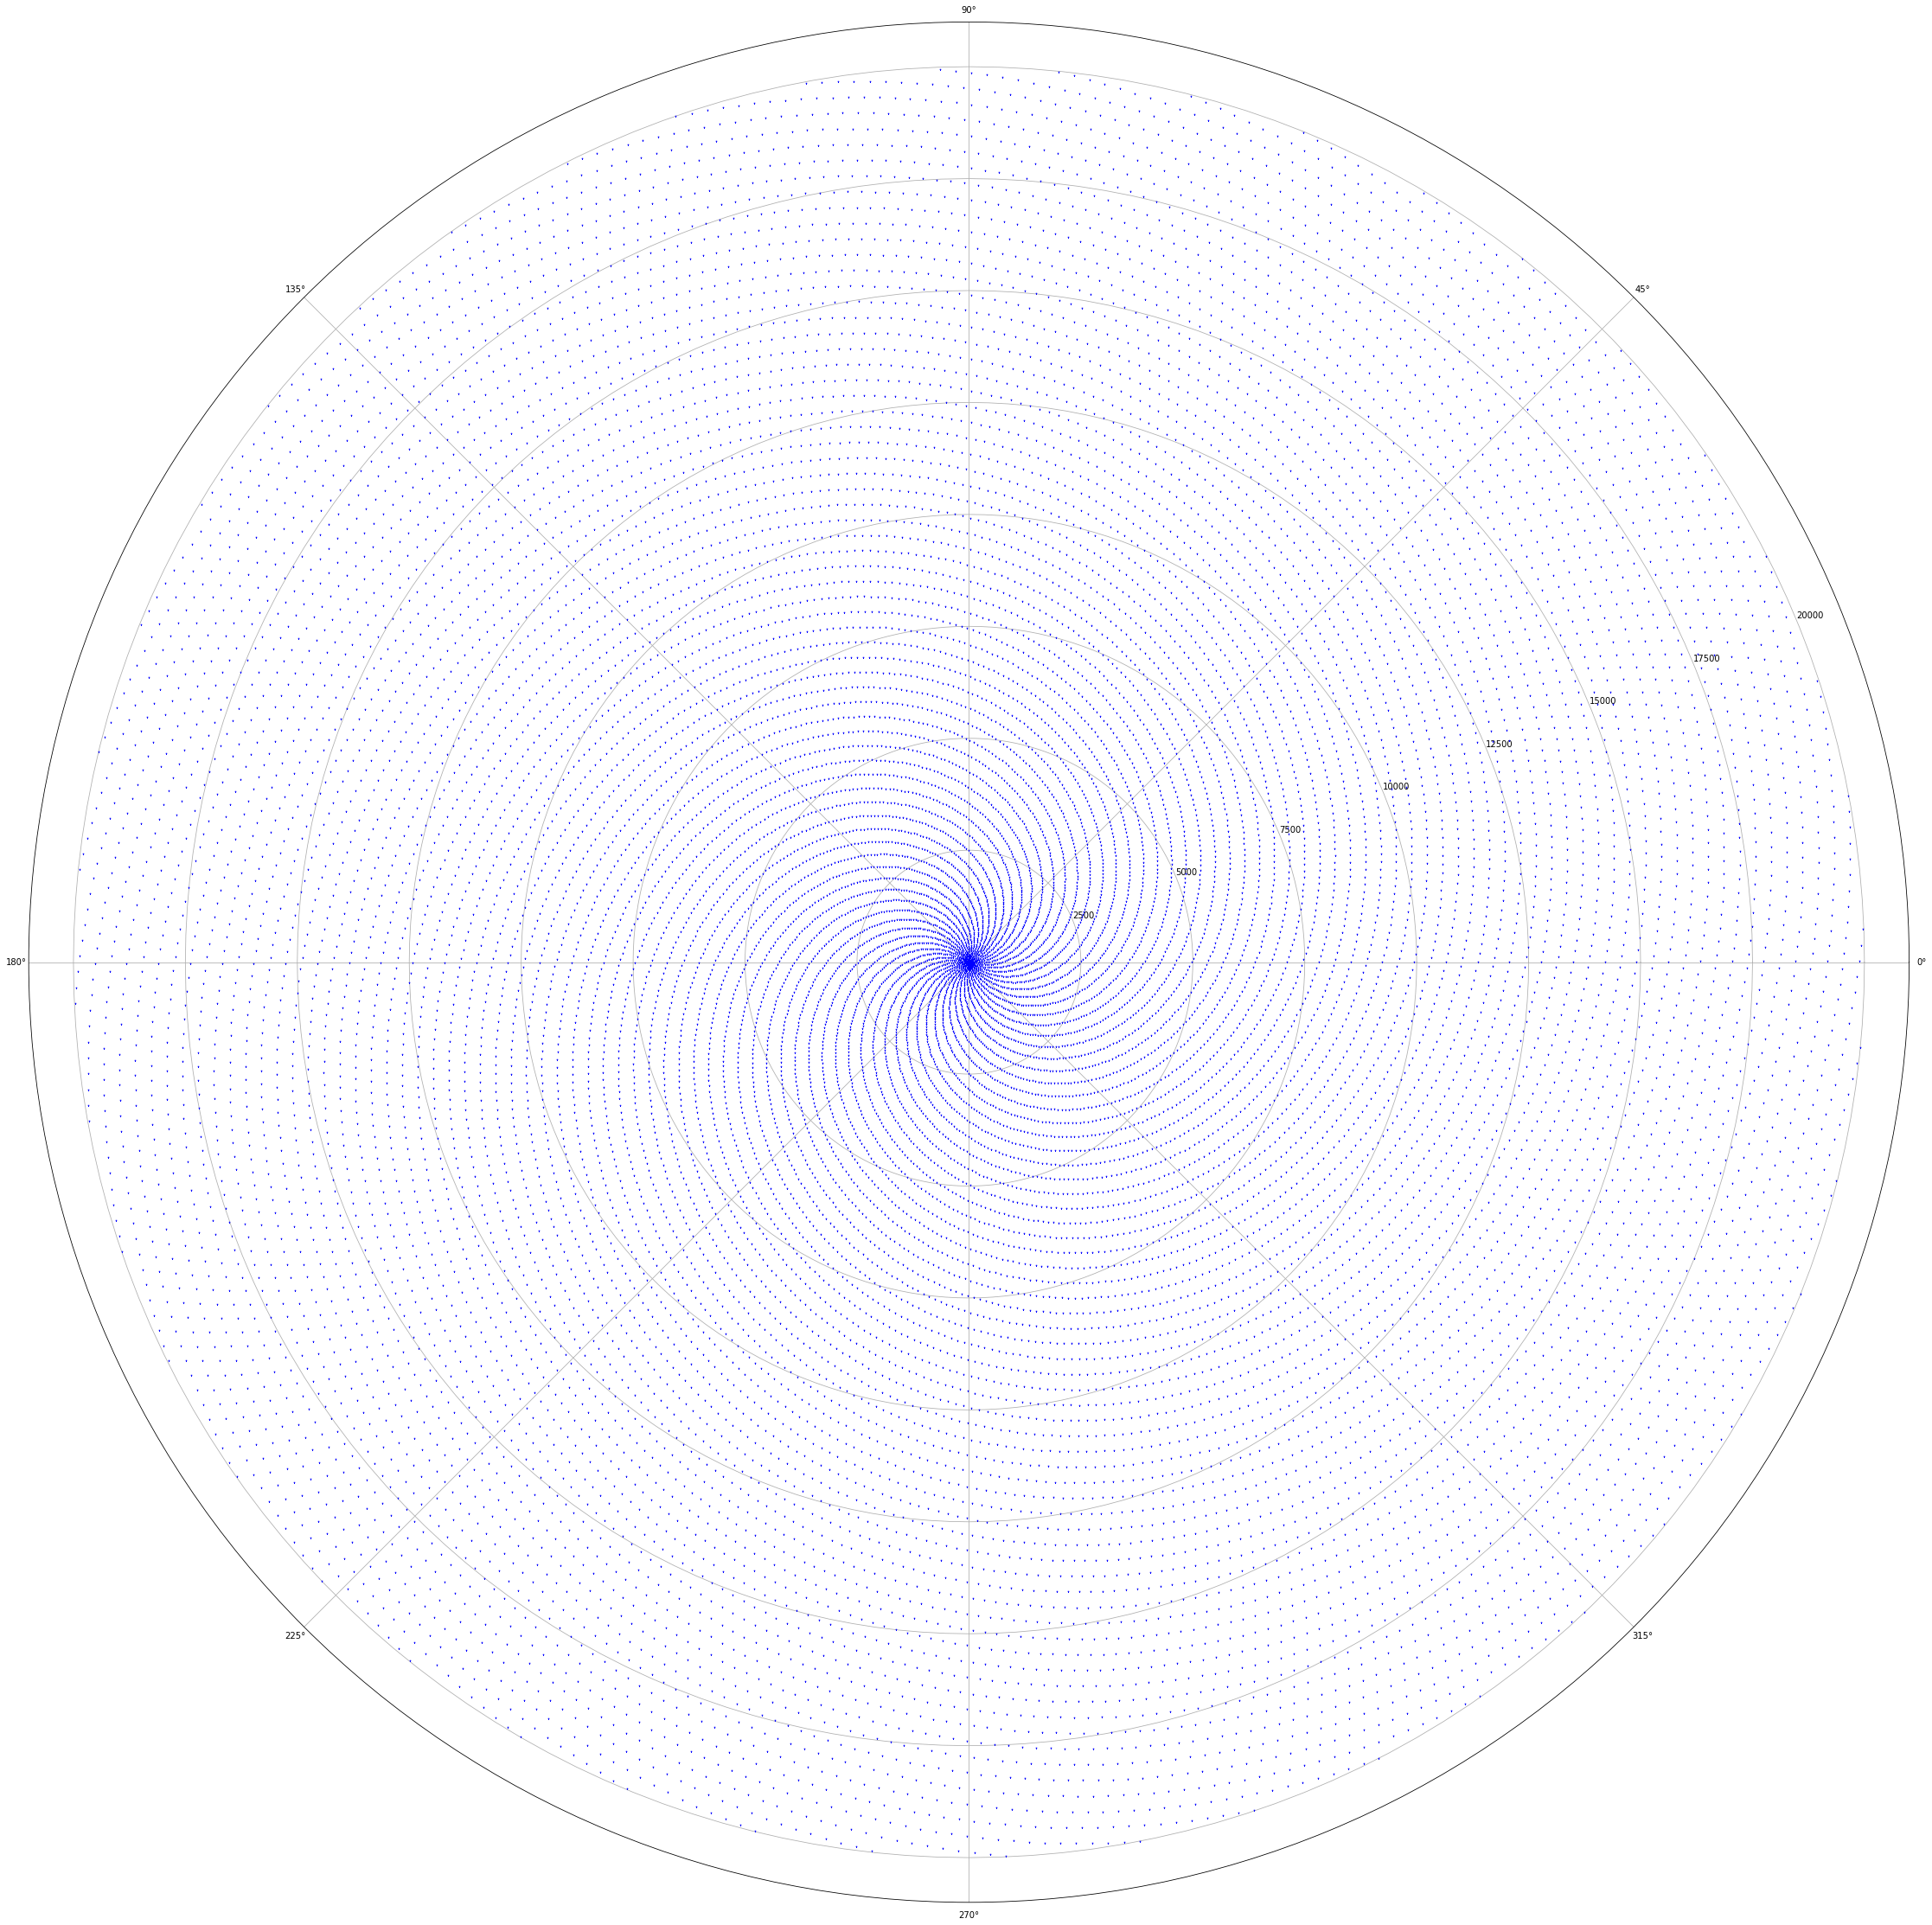

In [39]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0,20000)
plt.figure(figsize=(40,40))
ax = plt.subplot(111,projection='polar')
ax.plot(x,x,'bo',marker='1', markersize=2)

In [8]:
a = [5,5,4]
d = [0,8,4]

for i in range(len(a)):
    na = a[i]
    while True:
        if na < d[i]:
            na+=1
            continue
        if na % 2 != 0:
            na+=1
            continue
        else:
            print(na-a[i])
            break

1
3
0


In [37]:
import numpy as np

x=np.random.randint(0,1000,(2,2,3,4))
print(x)

for i in range(len(x.shape)):
    print('axis ' + str(i))
    ind = np.max(x,axis=i)
    n = np.min(x,axis=i)
    print("max")
    print(ind)
    print("min")
    print(n)

[[[[436 835  37  96]
   [312 190 472 257]
   [557 116 870 407]]

  [[ 58 582 813 896]
   [786 932 951 719]
   [341 845 107 483]]]


 [[[871 844 526 973]
   [745 374 557 459]
   [869 979 274 554]]

  [[387 419 899 194]
   [280 988 704  40]
   [949 850 745 197]]]]
axis 0
max
[[[871 844 526 973]
  [745 374 557 459]
  [869 979 870 554]]

 [[387 582 899 896]
  [786 988 951 719]
  [949 850 745 483]]]
min
[[[436 835  37  96]
  [312 190 472 257]
  [557 116 274 407]]

 [[ 58 419 813 194]
  [280 932 704  40]
  [341 845 107 197]]]
axis 1
max
[[[436 835 813 896]
  [786 932 951 719]
  [557 845 870 483]]

 [[871 844 899 973]
  [745 988 704 459]
  [949 979 745 554]]]
min
[[[ 58 582  37  96]
  [312 190 472 257]
  [341 116 107 407]]

 [[387 419 526 194]
  [280 374 557  40]
  [869 850 274 197]]]
axis 2
max
[[[557 835 870 407]
  [786 932 951 896]]

 [[871 979 557 973]
  [949 988 899 197]]]
min
[[[312 116  37  96]
  [ 58 582 107 483]]

 [[745 374 274 459]
  [280 419 704  40]]]
axis 3
max
[[[835 472 870]
 